In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 46.99,
  'feels_like': 44.67,
  'temp_min': 44.94,
  'temp_max': 49.96,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 17, 'gust': 15.01},
 'clouds': {'all': 90},
 'dt': 1635434881,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635419566,
  'sunset': 1635457382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 46.99,
  'feels_like': 44.67,
  'temp_min': 44.94,
  'temp_max': 49.96,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 17, 'gust': 15.01},
 'clouds': {'all': 90},
 'dt': 1635434881,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1635419566,
  'sunset': 1635457382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1635419566,
 'sunset': 1635457382}

In [14]:
boston_data["sys"]["country"]

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 49.96 77 90 5.01


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-28 15:28:01'

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maumere
Processing Record 2 of Set 1 | sumbawanga
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | havelock
Processing Record 5 of Set 1 | mabay
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | san carlos de bariloche
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | staunton
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | gbadolite
Processing Record 21 of Set 1 | mys shmidta
City n

Processing Record 35 of Set 4 | cape town
Processing Record 36 of Set 4 | sao jose da coroa grande
Processing Record 37 of Set 4 | kondinskoye
Processing Record 38 of Set 4 | dubreka
Processing Record 39 of Set 4 | san juan
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | syracuse
Processing Record 46 of Set 4 | pangnirtung
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | padang
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | karratha
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | dicabisagan
Processing Record 3 of Set 5 | yakeshi
Processing Record 4 of Set 5 | digby
Processing Record 5 of Set 5 | la palma
Processing Record 6 of Set 5 | manchar
Processing Record 7 of Set 5 | faanui
Processing Record 8 of Set 5 | waipawa
Pr

Processing Record 25 of Set 8 | green river
Processing Record 26 of Set 8 | lasa
Processing Record 27 of Set 8 | port hardy
Processing Record 28 of Set 8 | pundaguitan
Processing Record 29 of Set 8 | meadow lake
Processing Record 30 of Set 8 | hirado
Processing Record 31 of Set 8 | danshui
Processing Record 32 of Set 8 | hibbing
Processing Record 33 of Set 8 | bichena
Processing Record 34 of Set 8 | nadvoitsy
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | maturin
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | sechura
Processing Record 42 of Set 8 | ilo
Processing Record 43 of Set 8 | bintulu
Processing Record 44 of Set 8 | tambovka
Processing Record 45 of Set 8 | bac lieu
Processing Record 46 of Set 8 | chumikan
Processing Record 47 of Set 8 | rurrenabaque
Processing Record 48 of Set 8 | solne

Processing Record 10 of Set 12 | talcahuano
Processing Record 11 of Set 12 | semirom
Processing Record 12 of Set 12 | phek
Processing Record 13 of Set 12 | ntcheu
Processing Record 14 of Set 12 | flinders
Processing Record 15 of Set 12 | dafeng
Processing Record 16 of Set 12 | rosendal
Processing Record 17 of Set 12 | vestmanna
Processing Record 18 of Set 12 | kathmandu
Processing Record 19 of Set 12 | new ulm
Processing Record 20 of Set 12 | mayo
Processing Record 21 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 22 of Set 12 | panaba
Processing Record 23 of Set 12 | ketchikan
Processing Record 24 of Set 12 | chapais
Processing Record 25 of Set 12 | puerto escondido
Processing Record 26 of Set 12 | bacolod
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | nizhnyaya poyma
Processing Record 29 of Set 12 | surgut
Processing Record 30 of Set 12 | muriwai beach
Processing Record 31 of Set 12 | cap-aux-meules
Processing Record 32 of Set

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.6199,122.2111,82.40,79,95,2.86,ID,2021-10-28 15:28:49
1,Sumbawanga,-7.9667,31.6167,79.95,20,26,6.89,TZ,2021-10-28 15:28:50
2,Severo-Kurilsk,50.6789,156.1250,41.85,88,87,3.29,RU,2021-10-28 15:28:50
3,Havelock,34.8791,-76.9013,70.02,77,75,5.99,US,2021-10-28 15:28:50
4,Mabay,6.0577,124.4666,79.48,84,21,4.38,PH,2021-10-28 15:28:51
5,Puerto Ayora,-0.7393,-90.3518,73.36,90,98,4.00,EC,2021-10-28 15:28:51
6,San Carlos De Bariloche,-41.1456,-71.3082,64.15,20,0,12.66,AR,2021-10-28 15:26:27
7,Avarua,-21.2078,-159.7750,73.45,73,75,3.44,CK,2021-10-28 15:25:15
8,Arraial Do Cabo,-22.9661,-42.0278,82.36,78,75,18.41,BR,2021-10-28 15:28:52
9,Staunton,38.1496,-79.0717,56.95,69,90,5.75,US,2021-10-28 15:28:52


In [22]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2021-10-28 15:28:49,-8.6199,122.2111,82.40,79,95,2.86
1,Sumbawanga,TZ,2021-10-28 15:28:50,-7.9667,31.6167,79.95,20,26,6.89
2,Severo-Kurilsk,RU,2021-10-28 15:28:50,50.6789,156.1250,41.85,88,87,3.29
3,Havelock,US,2021-10-28 15:28:50,34.8791,-76.9013,70.02,77,75,5.99
4,Mabay,PH,2021-10-28 15:28:51,6.0577,124.4666,79.48,84,21,4.38


In [27]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

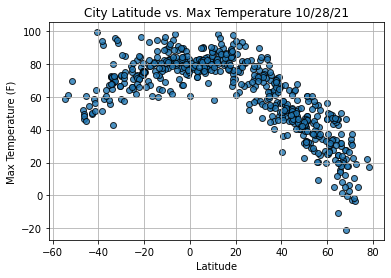

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

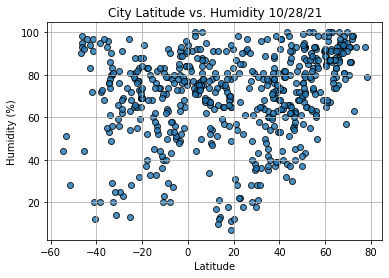

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

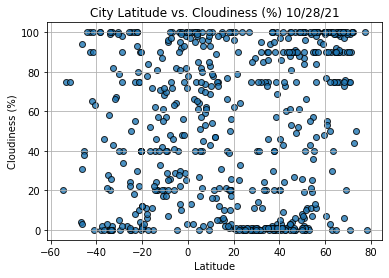

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

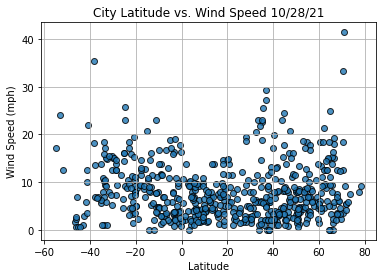

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

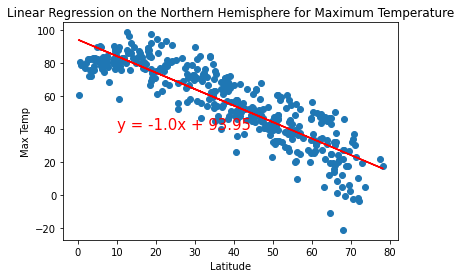

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))


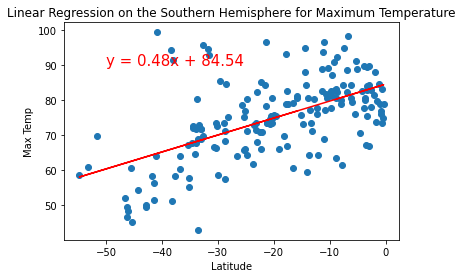

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


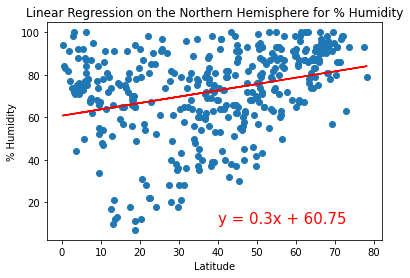

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


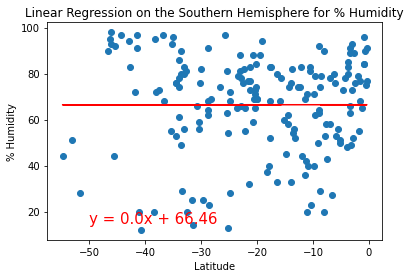

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

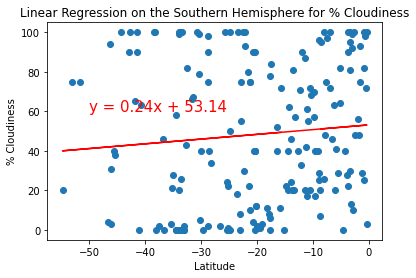

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

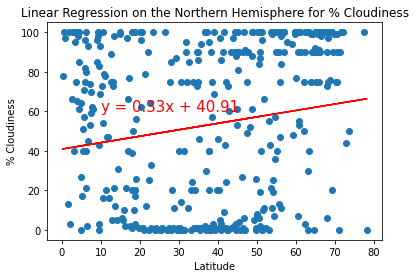

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

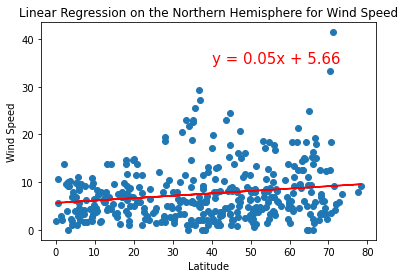

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

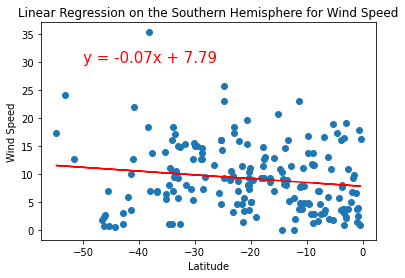

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))